In [1]:
import tensorflow as tf
from keras.datasets import cifar10
import numpy as np
np.random.seed(10)
import matplotlib.pyplot as plt
(x_img_train,y_label_train), \
(x_img_test, y_label_test)=cifar10.load_data()

Using TensorFlow backend.


In [3]:
#look cifar10 data
# print('train:',len(x_img_train))
# print('test:',len(x_img_test))
print(x_img_train.shape)
# print(x_img_test[0])
print(y_label_train.shape)

label_dict={0:'airplane', 1:'automobile', 2:'bird', 3:'cat', 4:'deer', 
            5:'dog', 6:'frog', 7:'horse', 8:'ship', 9:'truck'}


(50000, 32, 32, 3)
(50000, 1)


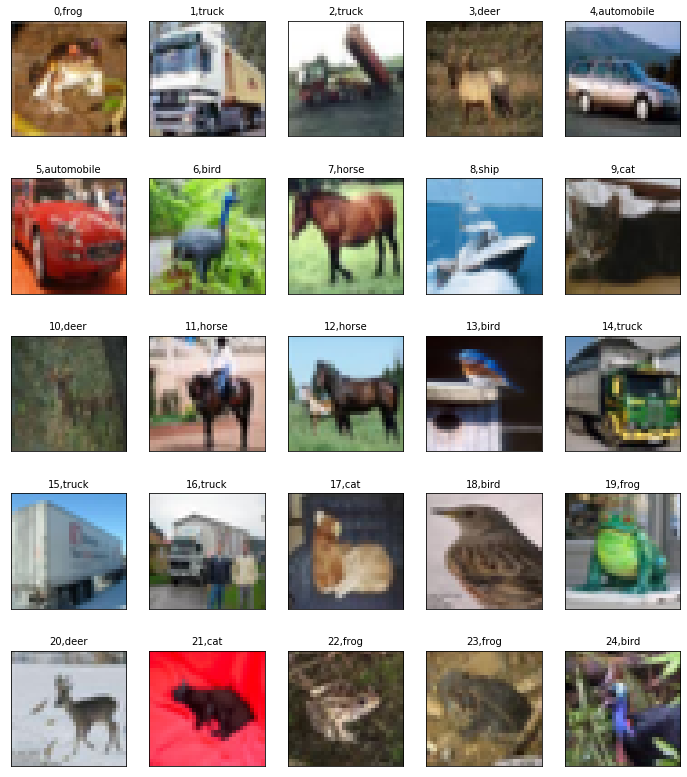

In [10]:
#look lots image function
def plot_images_labels_prediction(images, labels, prediction, idx, num=25):
    fig = plt.gcf()
    fig.set_size_inches(12,14)
    if num>25: num=25
    for i in range(0, num):
        ax = plt.subplot(5,5, 1+i)
        ax.imshow(images[idx], cmap='binary')
        title=str(i)+','+label_dict[labels[i][0]]
        if len(prediction)>0:
            title+='=>'+label_dict[prediction[i]]
            
        ax.set_title(title,fontsize=10)
        ax.set_xticks([]);ax.set_yticks([])
        idx+=1
    plt.show()

plot_images_labels_prediction(x_img_train, y_label_train,[],0)

In [13]:
#normalize
x_img_train_normalize = x_img_train.astype('float32')/255.0
x_img_test_normalize = x_img_test.astype('float32')/255.0
print(x_img_train_normalize[0][0][0])

#onehot encoding
from keras.utils import np_utils
y_label_train_OneHot = np_utils.to_categorical(y_label_train)
y_label_test_OneHot = np_utils.to_categorical(y_label_test)

[0.23137255 0.24313726 0.24705882]


In [28]:
#setting NN
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D, ZeroPadding2D
model = Sequential()
#conv1
model.add(Conv2D(filters=16,kernel_size=(3,3),
                 input_shape=(32,32,3),
                 activation='relu',
                 padding='same'))
model.add(Dropout(rate=0.3))
#pooling1
model.add(MaxPooling2D(pool_size=(2,2)))
#conv2
model.add(Conv2D(filters=32,kernel_size=(3,3),
                 activation='relu',
                 padding='same'))
model.add(Dropout(rate=0.3))
#pooling2
model.add(MaxPooling2D(pool_size=(2,2)))
#conv3
model.add(Conv2D(filters=64,kernel_size=(5,5),
                 activation='relu',
                 padding='same'))
model.add(Dropout(rate=0.3))
#pooling3
model.add(MaxPooling2D(pool_size=(2,2)))
#平坦層
model.add(Flatten())
model.add(Dropout(rate=0.3))
model.add(Dense(1500,activation='relu',))
model.add(Dropout(rate=0.3))
model.add(Dense(10,activation='softmax'))

model.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_11 (Conv2D)           (None, 32, 32, 16)        448       
_________________________________________________________________
dropout_19 (Dropout)         (None, 32, 32, 16)        0         
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 16, 16, 16)        0         
_________________________________________________________________
conv2d_12 (Conv2D)           (None, 16, 16, 32)        4640      
_________________________________________________________________
dropout_20 (Dropout)         (None, 16, 16, 32)        0         
_________________________________________________________________
max_pooling2d_11 (MaxPooling (None, 8, 8, 32)          0         
_________________________________________________________________
conv2d_13 (Conv2D)           (None, 8, 8, 64)         

In [29]:
#training
try:
    model.load_weights("cifarModel.h5")
    print("載入上次訓練model權重")
except:
    print("沒有model可以載入，訓練新model")
model.compile(loss='categorical_crossentropy',
              optimizer='adam',metrics=['accuracy'])

train_history = model.fit(x_img_train_normalize,y_label_train_OneHot,
                              validation_split=0.2,
                              epochs=50, batch_size=128,verbose=2)

Train on 40000 samples, validate on 10000 samples
Epoch 1/50
 - 4s - loss: 1.6088 - accuracy: 0.4120 - val_loss: 1.5664 - val_accuracy: 0.4764
Epoch 2/50
 - 3s - loss: 1.2826 - accuracy: 0.5374 - val_loss: 1.4320 - val_accuracy: 0.5211
Epoch 3/50
 - 3s - loss: 1.1472 - accuracy: 0.5895 - val_loss: 1.2240 - val_accuracy: 0.5976
Epoch 4/50
 - 3s - loss: 1.0602 - accuracy: 0.6233 - val_loss: 1.2264 - val_accuracy: 0.5889
Epoch 5/50
 - 3s - loss: 0.9905 - accuracy: 0.6486 - val_loss: 1.1584 - val_accuracy: 0.6102
Epoch 6/50
 - 3s - loss: 0.9370 - accuracy: 0.6668 - val_loss: 1.0771 - val_accuracy: 0.6428
Epoch 7/50
 - 3s - loss: 0.8807 - accuracy: 0.6866 - val_loss: 1.0928 - val_accuracy: 0.6259
Epoch 8/50
 - 3s - loss: 0.8377 - accuracy: 0.7037 - val_loss: 0.9851 - val_accuracy: 0.6850
Epoch 9/50
 - 3s - loss: 0.7931 - accuracy: 0.7204 - val_loss: 0.9165 - val_accuracy: 0.7078
Epoch 10/50
 - 3s - loss: 0.7674 - accuracy: 0.7276 - val_loss: 0.9737 - val_accuracy: 0.6742
Epoch 11/50
 - 3s -

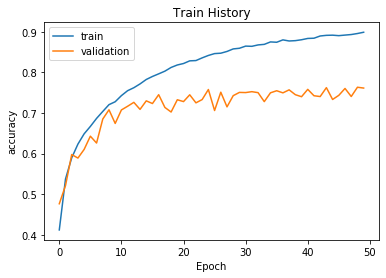

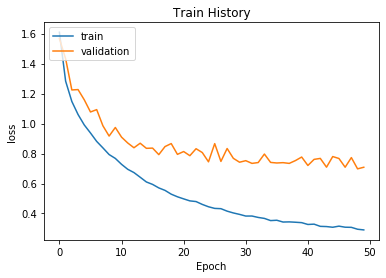

In [37]:
#plot
import matplotlib.pyplot as plt
def show_train_history(train_history, train, validation):
    plt.plot(train_history.history[train])
    plt.plot(train_history.history[validation])
    plt.title('Train History')
    plt.ylabel(train)
    plt.xlabel('Epoch')
    plt.legend(['train', 'validation'], loc='upper left')
    plt.show()

show_train_history(train_history,'accuracy','val_accuracy')
show_train_history(train_history,'loss','val_loss')



In [58]:
#test
scores = model.evaluate(x_img_test_normalize,
                        y_label_test_OneHot, verbose=0)
for x,y in zip(scores, model.metrics_names):
    print(y+":"+str(x))
    


loss:0.7286802364349365
accuracy:0.7519999742507935


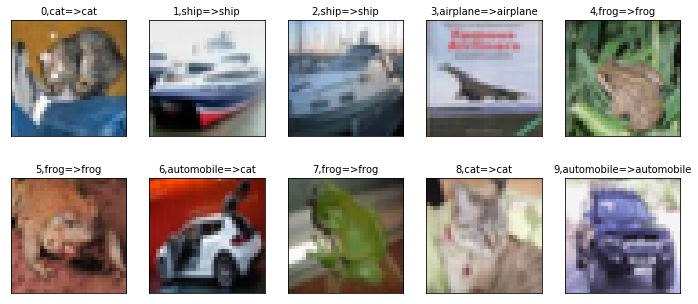

In [62]:
prediction = model.predict_classes(x_img_test_normalize)
plot_images_labels_prediction(x_img_test, y_label_test,prediction,0,10)

label: cat predict: cat


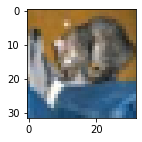

airplane Probability:0.004579278
automobile Probability:0.000861000
bird Probability:0.017268410
cat Probability:0.887790740
deer Probability:0.004286460
dog Probability:0.054406520
frog Probability:0.015803648
horse Probability:0.002906295
ship Probability:0.011100591
truck Probability:0.000997011
label: ship predict: ship


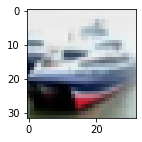

airplane Probability:0.068514384
automobile Probability:0.060002614
bird Probability:0.000026932
cat Probability:0.001201490
deer Probability:0.000033489
dog Probability:0.000810821
frog Probability:0.000190074
horse Probability:0.000043892
ship Probability:0.857245624
truck Probability:0.011930643
label: ship predict: ship


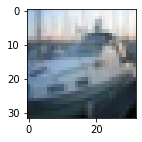

airplane Probability:0.141752616
automobile Probability:0.067876086
bird Probability:0.004922607
cat Probability:0.042271551
deer Probability:0.007479464
dog Probability:0.026082493
frog Probability:0.006630301
horse Probability:0.027816787
ship Probability:0.566521287
truck Probability:0.108646862
label: airplane predict: airplane


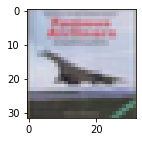

airplane Probability:0.623647273
automobile Probability:0.001053699
bird Probability:0.179877982
cat Probability:0.002330538
deer Probability:0.053212930
dog Probability:0.003668875
frog Probability:0.001839443
horse Probability:0.000510651
ship Probability:0.133533105
truck Probability:0.000325604
label: frog predict: frog


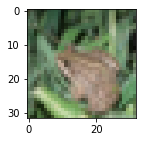

airplane Probability:0.000000363
automobile Probability:0.000001867
bird Probability:0.064120956
cat Probability:0.061683267
deer Probability:0.107742779
dog Probability:0.000216787
frog Probability:0.766214907
horse Probability:0.000002388
ship Probability:0.000016006
truck Probability:0.000000742


In [65]:
#查看單獨圖片預測結果
Predicted_Probability = model.predict(x_img_test_normalize)
def show_predicted_probablity(y, prediction, x_img, Predicted_Probability, i):
    print('label:',label_dict[y[i][0]],
          'predict:', label_dict[prediction[i]])
    plt.figure(figsize=(2,2))
    plt.imshow(np.reshape(x_img_test[i],(32,32,3)))
    plt.show()
    for j in range(10):
        print(label_dict[j]+
              ' Probability:%1.9f'%(Predicted_Probability[i][j]))
for i in range(5):
    show_predicted_probablity(y_label_test,prediction,
                           x_img_test,Predicted_Probability,i)



In [66]:
#confusion matrix
y_label_test.reshape(-1)
import pandas as pd
print(label_dict)
pd.crosstab(y_label_test.reshape(-1),prediction,
            rownames=['label'],colnames=['predict'])

{0: 'airplane', 1: 'automobile', 2: 'bird', 3: 'cat', 4: 'deer', 5: 'dog', 6: 'frog', 7: 'horse', 8: 'ship', 9: 'truck'}


predict,0,1,2,3,4,5,6,7,8,9
label,,,,,,,,,,
0,766,7,73,15,29,4,16,6,70,14
1,19,836,10,10,4,4,15,3,43,56
2,30,2,707,49,93,31,68,9,10,1
3,11,4,80,542,94,135,98,24,8,4
4,8,0,47,36,805,17,52,25,9,1
5,6,0,69,158,76,601,49,33,6,2
6,2,2,25,34,39,11,878,2,7,0
7,10,1,38,34,93,47,20,746,4,7
8,39,10,16,18,22,11,14,1,855,14


In [67]:
model.save_weights("cifarModel.h5")
print("save model")

save model
